<a href="https://colab.research.google.com/github/Pittella0/HomeWork/blob/main/WK11HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The data i am using is spotify top 50 songs of 2019


im also skippin the first row because the names where a mess

In [ ]:
# load up some pandas and what not
import string as strg
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

URL="https://raw.githubusercontent.com/Pittella0/HomeWork/main/top50.csv"
columnNames = ["ID","Track Name","Artist Name","Genre","BPM","Energy","Danceability","Loudness dB","Liveness","Valence","Length","Acousticness","Speechiness","Popularity"]

df = pd.read_csv( URL, encoding = 'unicode_escape',  names = columnNames, skiprows=1 )

copy_df = df.copy()
df.head()


ID                       Track Name    Artist Name           Genre  BPM  \
0   1                         Señorita   Shawn Mendes    canadian pop  117   
1   2                            China       Anuel AA  reggaeton flow  105   
2   3    boyfriend (with Social House)  Ariana Grande       dance pop  190   
3   4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   93   
4   5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap  150   

   Energy  Danceability  Loudness dB  Liveness  Valence  Length  Acousticness  \
0      55            76           -6         8       75     191             4   
1      81            79           -4         8       61     302             8   
2      80            40           -4        16       70     186            12   
3      65            64           -8         8       55     198            12   
4      65            58           -4        11       18     175            45   

   Speechiness  Popularity  
0            3          79  
1            9          92  
2           46          85  
3           19          86  
4            7          94

In [ ]:
# whats it lookin like
df.shape


(50, 14)

In [ ]:
#checking for nulls
df.isnull().sum()

ID              0
Track Name      0
Artist Name     0
Genre           0
BPM             0
Energy          0
Danceability    0
Loudness dB     0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

**According to Spotify these are the break down of what the vague columns are** 

*   **Acousticness**: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation
 “a value above 0.8 provides strong likelihood that the track is live”.

*   **Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

*   **Energy**: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

*   **Danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

*   **Valence**: “A measure from 0.0 to 1.0 describing the musical 
positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.


In [ ]:

df = df.astype({'ID':'int'})
df.head()

ID                       Track Name    Artist Name           Genre  BPM  \
0   1                         Señorita   Shawn Mendes    canadian pop  117   
1   2                            China       Anuel AA  reggaeton flow  105   
2   3    boyfriend (with Social House)  Ariana Grande       dance pop  190   
3   4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   93   
4   5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap  150   

   Energy  Danceability  Loudness dB  Liveness  Valence  Length  Acousticness  \
0      55            76           -6         8       75     191             4   
1      81            79           -4         8       61     302             8   
2      80            40           -4        16       70     186            12   
3      65            64           -8         8       55     198            12   
4      65            58           -4        11       18     175            45   

   Speechiness  Popularity  
0            3          79  
1            9          92  
2           46          85  
3           19          86  
4            7          94

In [ ]:
#checking whats unique
df.nunique()

ID              50
Track Name      50
Artist Name     38
Genre           21
BPM             31
Energy          31
Danceability    29
Loudness dB      9
Liveness        22
Valence         39
Length          44
Acousticness    35
Speechiness     24
Popularity      18
dtype: int64

# Who is a regular at the top 50?

In [ ]:

print(df["Artist Name"].value_counts())

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist Name, dtype: int64


In [ ]:
# i get the artists who are in the top 50 more than once
count = df["Artist Name"].value_counts()
artists = count[count>1].index
multiHits = df[df["Artist Name"].isin(artists)]
print(" Artist Name \n")
print(multiHits["Artist Name:"].value_counts())
print("\n Genre: \n")
print(multiHits["Genre"].value_counts())

 Artist Name 

Ed Sheeran          4
Shawn Mendes        2
Ariana Grande       2
Post Malone         2
Lil Nas X           2
Billie Eilish       2
Sech                2
J Balvin            2
The Chainsmokers    2
Marshmello          2
Name: Artist Name, dtype: int64

 Genre: 

pop               4
canadian pop      2
dance pop         2
dfw rap           2
country rap       2
electropop        2
panamanian pop    2
latin             2
edm               2
brostep           2
Name: Genre, dtype: int64


We are looking at which artist was on the leader boards more than once, so we need to grab a count of all our artists; Are their artists in the top 50 multiple times? If so I want to set my count above 1, which I do with .index. Now I save the results in a data frame multiHits, and I print out the results as well as what genre the artist’s song is in.
<br>
I have no clue what brostep is.
<br>
Here we can see who has been on the top 50 playlist more than once. It’s clear to se that Ed Sheeran has the most hits in 2019, and pop and 2 different flavors of it were the top 3 genres of 2019

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            50 non-null     int64 
 1   Track Name    50 non-null     object
 2   Artist Name   50 non-null     object
 3   Genre         50 non-null     object
 4   BPM           50 non-null     int64 
 5   Energy        50 non-null     int64 
 6   Danceability  50 non-null     int64 
 7   Loudness dB   50 non-null     int64 
 8   Liveness      50 non-null     int64 
 9   Valence       50 non-null     int64 
 10  Length        50 non-null     int64 
 11  Acousticness  50 non-null     int64 
 12  Speechiness   50 non-null     int64 
 13  Popularity    50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


So glad boy bands are on the decline lol

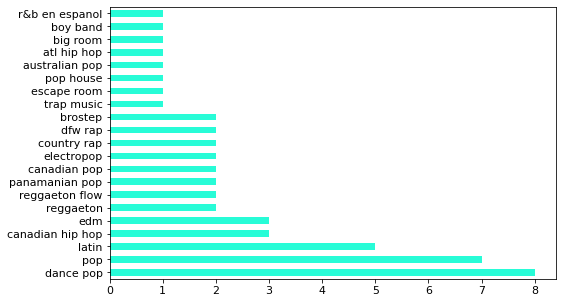

In [ ]:
coolColors=["#28FCD7","#27F295","#30D3E6"]
plt.figure(figsize=(8,5))
df['Genre'].value_counts().plot(kind='barh',color="#28FCD7", fontsize = 11)

# Histogram

It’s clear to see the connection between Danceability, Energy, Speechiness, Valence, and Loudness dB. Which makes sense people like to sing and dance.


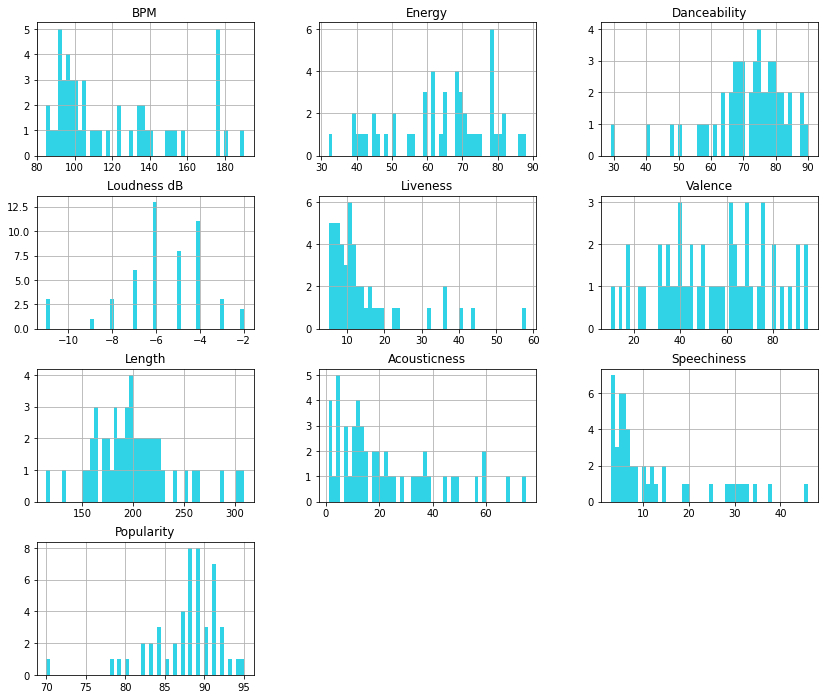

In [ ]:
#create a dataframe that just houses the numerical data
df_numerical = df.drop(['Genre','Artist Name','Track Name','ID'],axis = 1)

df_numerical.hist(bins=50,color='#30D3E6', figsize=(14,12))
plt.show()

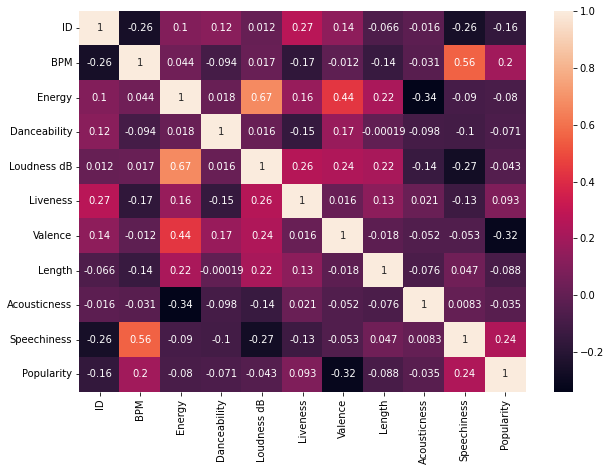

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix["ID"].sort_values(ascending=False)

ID              1.000000
Liveness        0.270659
Valence         0.137329
Danceability    0.122691
Energy          0.102649
Loudness dB     0.011914
Acousticness   -0.015993
Length         -0.065844
Popularity     -0.160680
Speechiness    -0.257506
BPM            -0.259193
Name: ID, dtype: float64

### I try to scatter plot a few interesting correlations


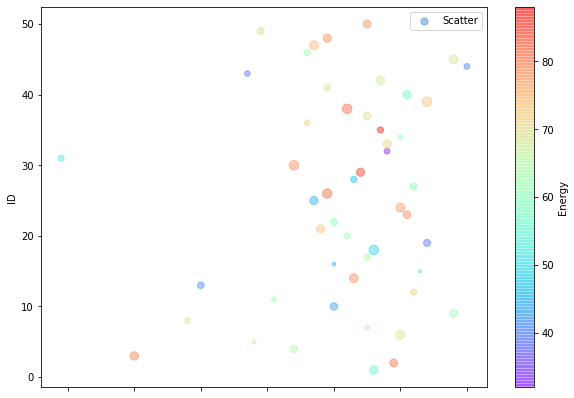

In [ ]:
# there is a relationship between songs with high Danceability and high Valence
df.plot(kind="scatter", x="Danceability", y="ID", alpha=0.4,
    s=df["Valence"], label="Scatter", figsize=(10,7),c= "Energy", cmap=plt.get_cmap("rainbow"), colorbar=True)

plt.legend()

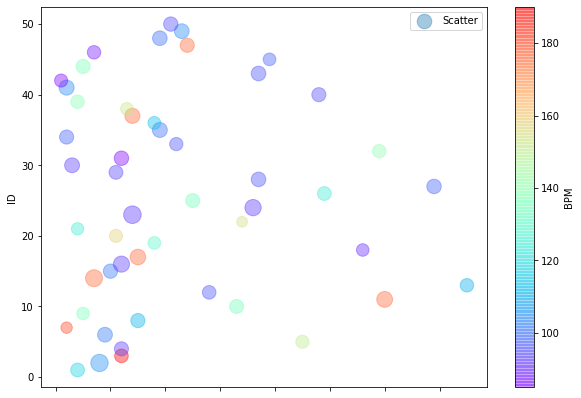

In [ ]:
df.plot(kind="scatter", x="Acousticness", y="ID", alpha=0.4,
    s=df["Length"], label="Scatter", figsize=(10,7),c= "BPM", cmap=plt.get_cmap("rainbow"), colorbar=True)

plt.legend()

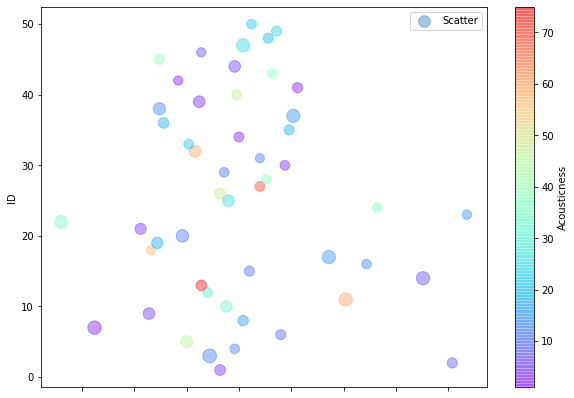

In [ ]:
df.plot(kind="scatter", x="Length", y="ID", alpha=0.4,
    s=df["BPM"], label="Scatter", figsize=(10,7),c= "Acousticness", cmap=plt.get_cmap("rainbow"), colorbar=True)

plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5db3b9b6d0>,
      dtype=object)

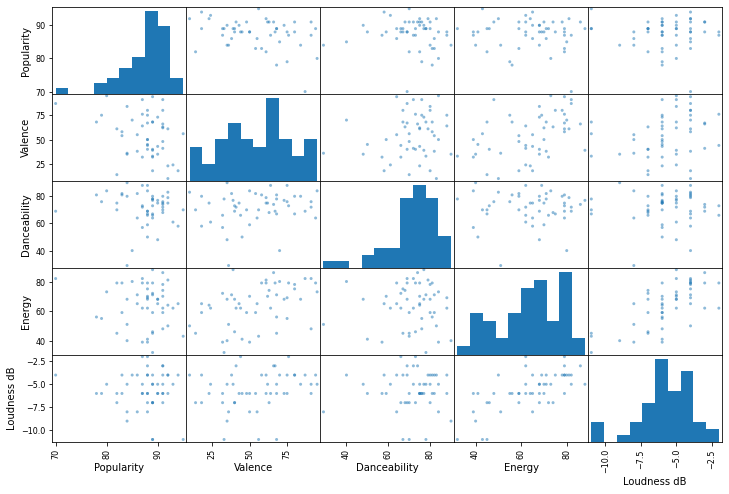

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Popularity','Valence','Danceability','Energy', 'Loudness dB']
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Final Thoughts

To make it to the top 50 Spotify charts back in 2019, 
your song needs to have a positive Valence, along with being highly danceable. Looking over the data its clear if your song is designed to make people dance you might make it to the top 50 play list 


We also know Ed Sheeran hit the top 50 4 times, and artists like Ariana Grande and Marshmello only made it twice. (i picked them because i only know who these 3 are on that list )

In [ ]:
special = '0123456789'
some_nums = special[0:10:2]
print(some_nums )

02468
